# Importing Packages 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from datetime import datetime

# Data Loading and Cleaning

In [257]:
directory = "snap-zip-fns388a-4" 
allFiles = {}; 

for file in glob.glob(directory + '/*.xls'):
    date_obj = datetime.strptime(file.split('/')[1][:-4], "%b %Y")
    print(date_obj) 
    tempDF = pd.read_excel(file, skiprows=3, skipfooter = 2)
    tempDF = tempDF.replace('  ', pd.NA)
    tempDF = tempDF.fillna(0)
    
    for column in tempDF: 
        if 'Unnamed' in column:
            tempDF = tempDF.drop(columns = [column])
        
    tempDF[list(tempDF.columns[1:])] = tempDF[list(tempDF.columns[1:])].apply(pd.to_numeric)
    allFiles[date_obj] = (tempDF)

for file in glob.glob(directory + '/*.xlsx'):
    if '$' not in file: 
        print(file.split('/')[1])
        print(len(file.split('/')[1]))
        if len(file.split('/')[1][:-5]) > 8: 
            date_obj = datetime.strptime(file.split('/')[1][:-5], "%B %Y")
        else:
            date_obj = datetime.strptime(file.split('/')[1][:-5], "%b %Y")
        print(date_obj) 
        tempDF = pd.read_excel(file, skiprows=3, skipfooter = 2)
        tempDF = tempDF.replace('  ', pd.NA)
        tempDF = tempDF.fillna(0)
        
        for column in tempDF: 
            if 'Unnamed' in column:
                tempDF = tempDF.drop(columns = [column])
            
        tempDF[list(tempDF.columns[1:])] = tempDF[list(tempDF.columns[1:])].apply(pd.to_numeric)
        allFiles[date_obj] = (tempDF)

2003-01-01 00:00:00
2017-01-01 00:00:00
2016-01-01 00:00:00
2002-01-01 00:00:00
2014-01-01 00:00:00
2000-01-01 00:00:00
2019-07-01 00:00:00
2018-07-01 00:00:00
2001-01-01 00:00:00
2015-01-01 00:00:00
2008-07-01 00:00:00
2011-01-01 00:00:00
2005-01-01 00:00:00
2004-01-01 00:00:00
2010-01-01 00:00:00
2009-07-01 00:00:00
2006-01-01 00:00:00
2012-01-01 00:00:00
2013-01-01 00:00:00
2007-01-01 00:00:00
1996-07-01 00:00:00
1997-07-01 00:00:00
1995-07-01 00:00:00
1998-01-01 00:00:00
1999-01-01 00:00:00
1994-07-01 00:00:00
1989-01-01 00:00:00
1990-07-01 00:00:00
1991-07-01 00:00:00
1993-07-01 00:00:00
1992-07-01 00:00:00
1992-01-01 00:00:00
1993-01-01 00:00:00
1991-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1999-07-01 00:00:00
1994-01-01 00:00:00
1995-01-01 00:00:00
1998-07-01 00:00:00
1997-01-01 00:00:00
1996-01-01 00:00:00
2013-07-01 00:00:00
2007-07-01 00:00:00
2006-07-01 00:00:00
2012-07-01 00:00:00
2004-07-01 00:00:00
2021-01-01 00:00:00
2010-07-01 00:00:00
2009-01-01 00:00:00


In [258]:
allFilesList = sorted(allFiles.items(), reverse = False) 

newList = {}

for item in allFilesList:
    newList[item[0]] = item[1]

In [259]:
for key in newList.keys():
    newDF = newList[key]['Substate/Region'].str.split(" ", expand=True)
    columnDict = {}
    for columnName in newDF.columns:
        columnDict[columnName] = "EXPANDED_ID_" + str(columnName)
        
    newDF = newDF.rename(mapper=columnDict, axis=1)
    newList[key] = pd.concat([newDF, newList[key]], axis=1)

In [260]:
newList[list(newList.keys())[69]]

,EXPANDED_ID_0,EXPANDED_ID_1,EXPANDED_ID_2,EXPANDED_ID_3,EXPANDED_ID_4,EXPANDED_ID_5,EXPANDED_ID_6,EXPANDED_ID_7,EXPANDED_ID_8,Substate/Region,SNAP All Persons Public Assistance Participation,SNAP All Persons Non-Public Assistance Participation,Calc: SNAP Total PA and Non-PA People,SNAP All Households Public Assistance Participation,SNAP All Households Non-Public Assistance Participation,Calc: SNAP Total PA and Non-PA Households,SNAP All Total Actual PA & Non-PA Issuance
0,0100101,AL,EBT,AUTAUGA,CO,FS,OFF,None,None,0100101 AL EBT AUTAUGA CO FS OFF,958,6818,7776,586,3029,3615,1439934
1,0100301,AL,EBT,BALDWIN,CO,FS,OFF,None,None,0100301 AL EBT BALDWIN CO FS OFF,1803,20042,21845,1147,9095,10242,4161067
2,0100501,AL,EBT,BARBOUR,CO,FS,OFF,None,None,0100501 AL EBT BARBOUR CO FS OFF,799,5213,6012,514,2473,2987,1136374
3,0100701,AL,EBT,BIBB,CO,FS,OFF,None,None,0100701 AL EBT BIBB CO FS OFF,519,2813,3332,356,1378,1734,598634
4,0100901,AL,EBT,BLOUNT,CO,FS,OFF,None,None,0100901 AL EBT BLOUNT CO FS OFF,883,5884,6767,614,2738,3352,1205872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,5515101,WI,EBT,LAC,DU,FLAMBEAU,TRIBAL,None,None,5515101 WI EBT LAC DU FLAMBEAU TRIBAL,75,1260,1335,72,503,575,236083
2653,5515301,WI,EBT,SOKAOGON,TRIBAL,AGENCY,None,None,None,5515301 WI EBT SOKAOGON TRIBAL AGENCY,12,169,181,11,72,83,27659
2654,5515501,WI,EBT,POTAWATOMI,TRIBE,None,None,None,None,5515501 WI EBT POTAWATOMI TRIBE,2,40,42,2,10,12,3818
2655,5600002,WY,EBT,WYOMING,SD,PASS,None,None,None,5600002 WY EBT WYOMING SD PASS,1148,27521,28669,357,13646,14003,4844842


# Data Visualization

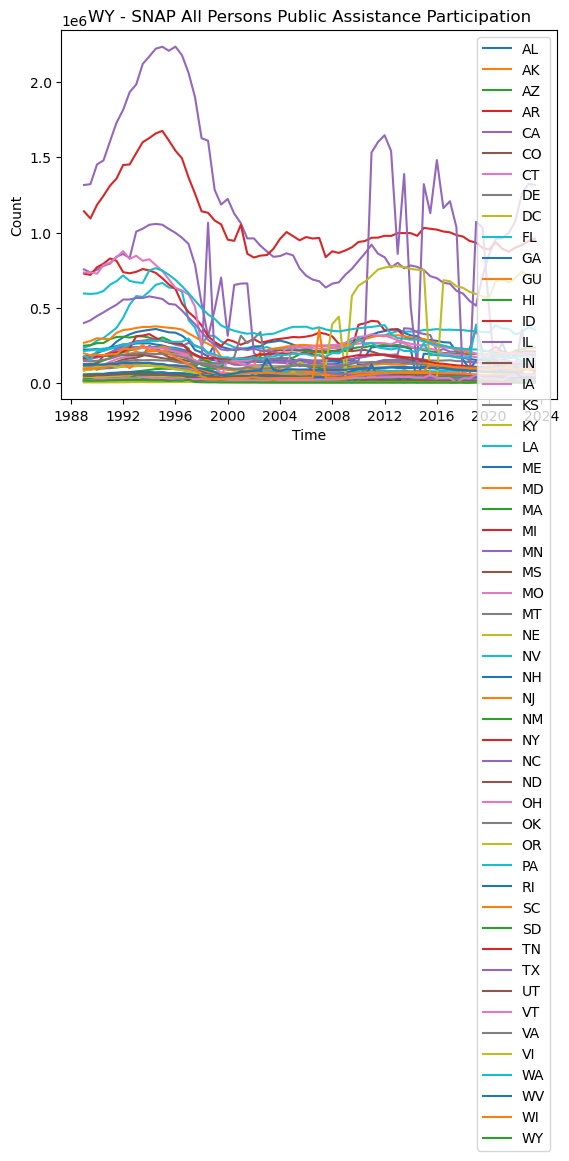

In [266]:
ColumnToVisualize = 'SNAP All Persons Public Assistance Participation'
states = newList[list(newList.keys())[69]]["EXPANDED_ID_1"].unique()
states = states[:-1]
dates = list(newList.keys())

for state in states: 
    counts = []
    for date in dates:
        currentDF = newList[date][newList[date]["EXPANDED_ID_1"] == state]
        counts.append(sum(currentDF[ColumnToVisualize])) 
    
    plt.plot(dates, counts, label = state)


plt.title(state + " - " + ColumnToVisualize)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

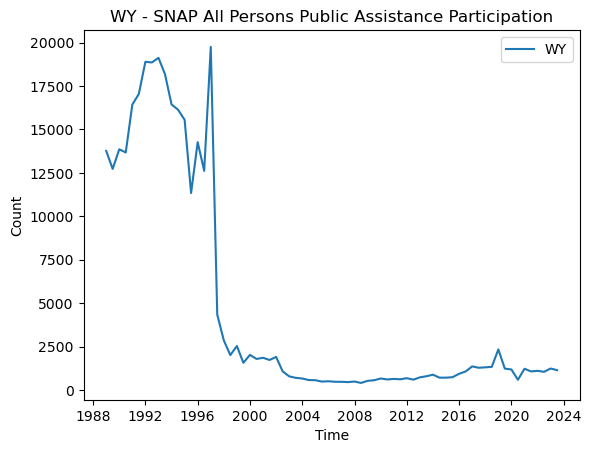

In [268]:
ColumnToVisualize = 'SNAP All Persons Public Assistance Participation'
states = "Summary"

counts = []

for date in dates:
    currentDF = newList[date][newList[date]["EXPANDED_ID_1"] == state]
    counts.append(sum(currentDF[ColumnToVisualize])) 

plt.plot(dates, counts, label = state)


plt.title(state + " - " + ColumnToVisualize)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()